<a href="https://colab.research.google.com/github/gurram46/Logistic-Regression/blob/main/Logistic_Regression(2)_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df=pd.read_csv('/content/Titanic_train.csv')
test_df=pd.read_csv('/content/Titanic_test.csv')


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


**Handling missing values**

In [ ]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)



Convert categorical variables to numeric

In [ ]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)


# EDA

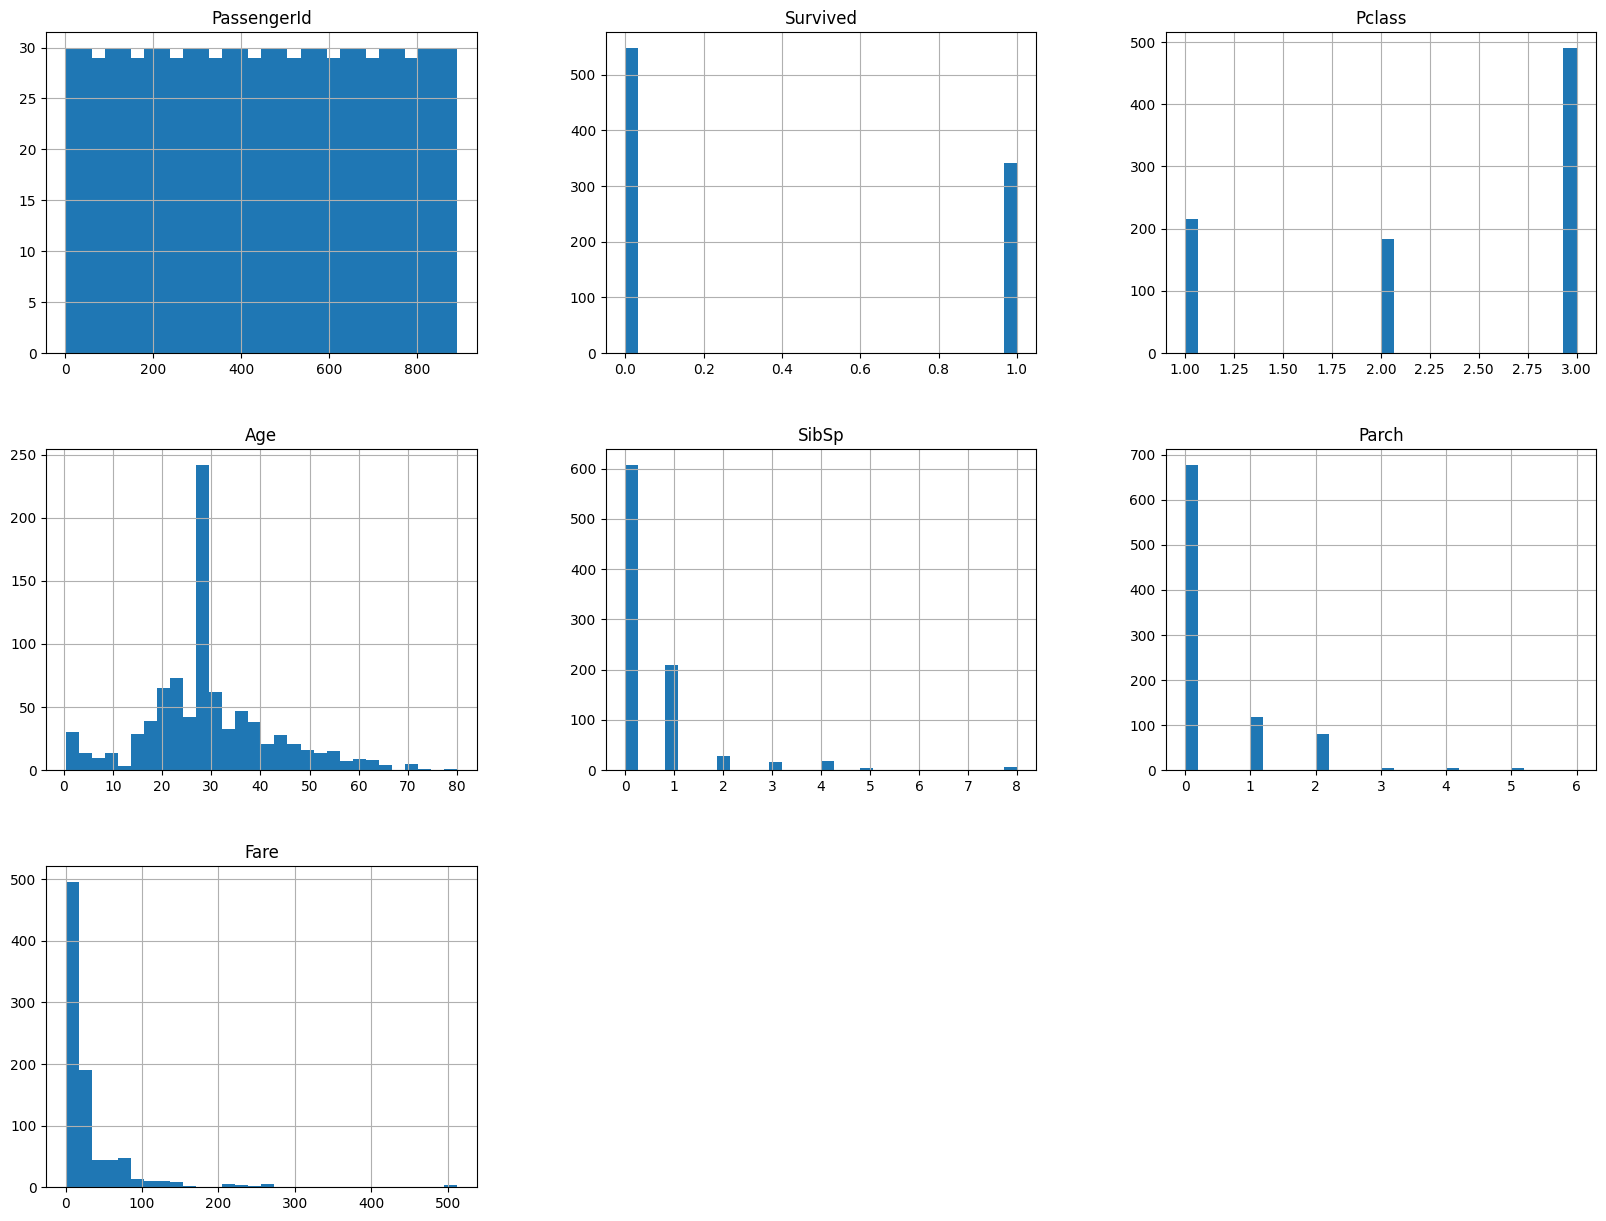

In [ ]:
train_df.hist(bins=30, figsize=(20, 15))
plt.show()


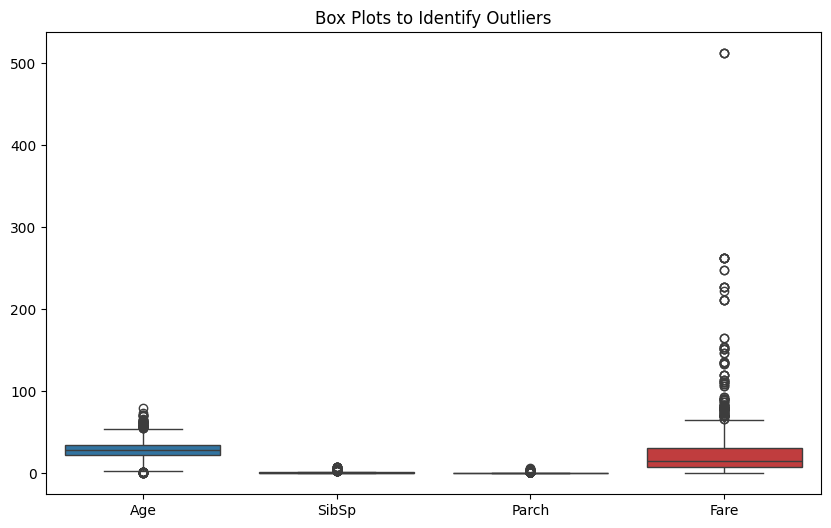

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df[['Age', 'SibSp', 'Parch', 'Fare']])
plt.title('Box Plots to Identify Outliers')
plt.show()


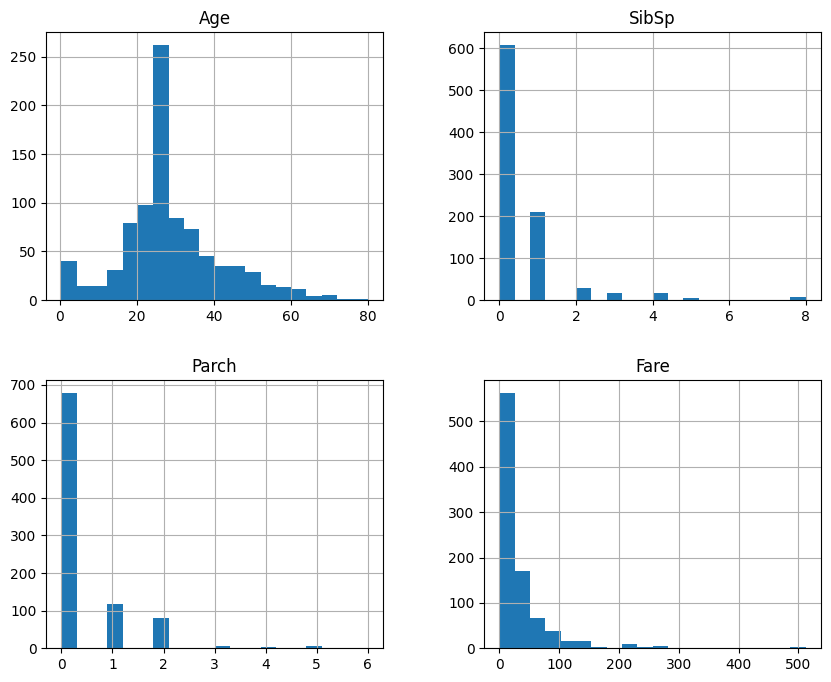

In [ ]:
train_df[['Age', 'SibSp', 'Parch', 'Fare']].hist(bins=20, figsize=(10, 8))
plt.show()

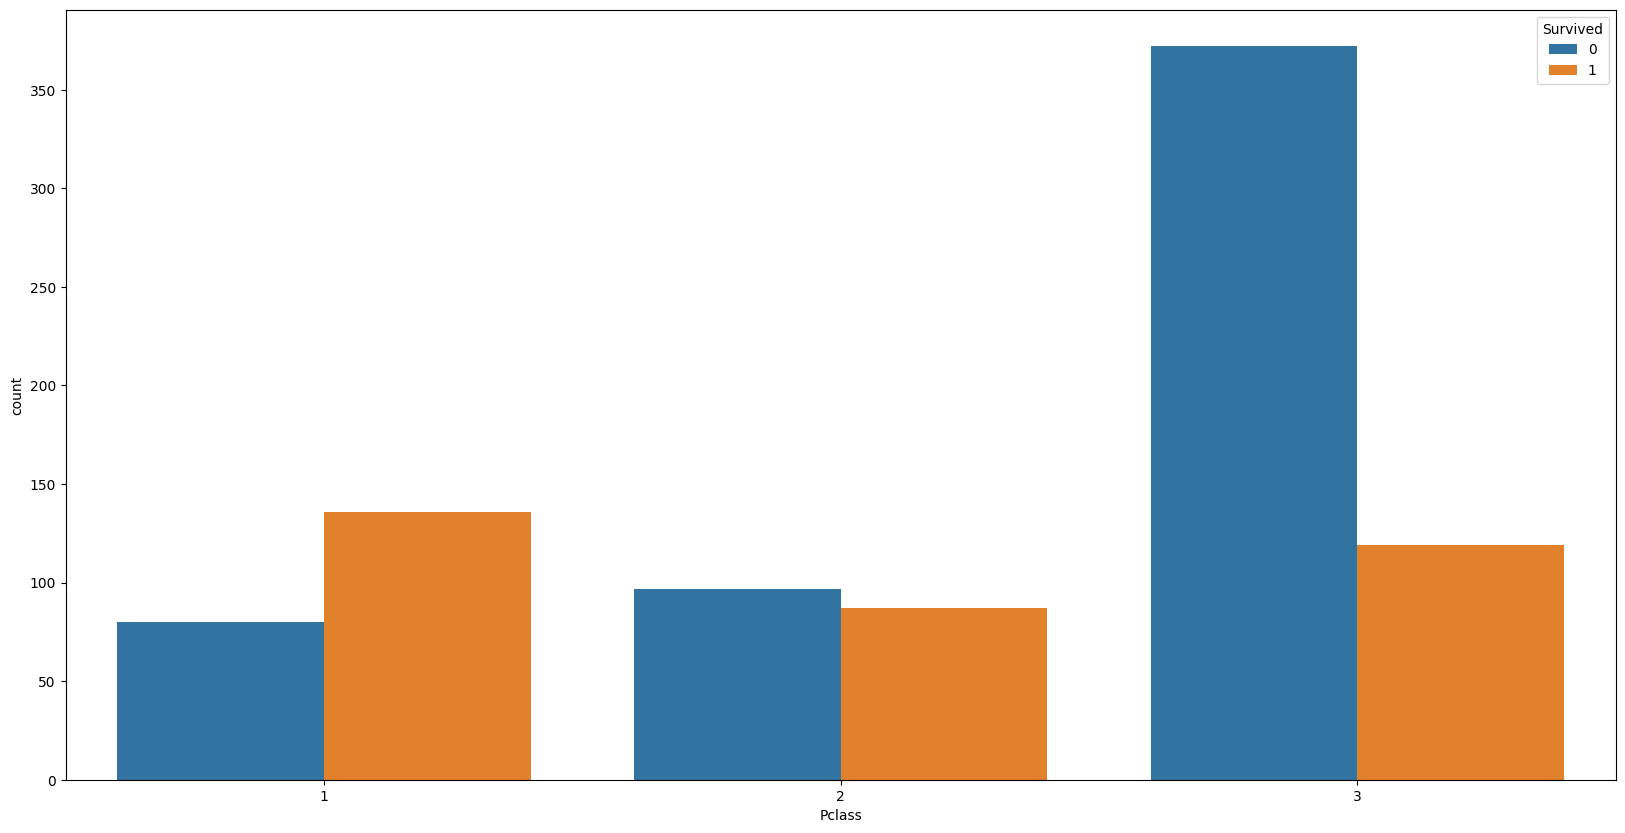

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.show()




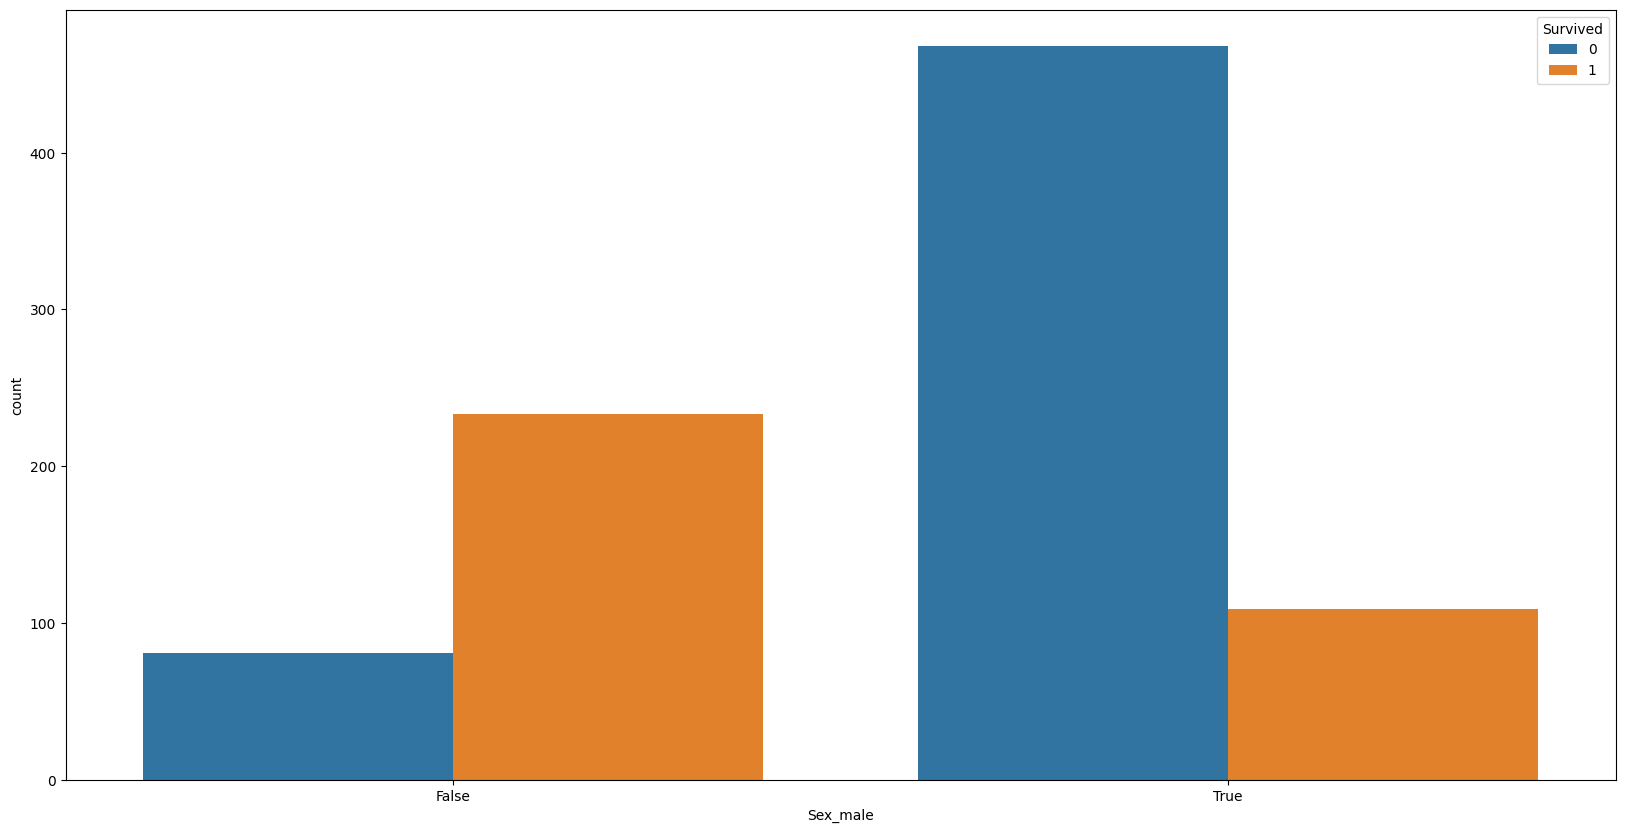

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Sex_male', hue='Survived', data=train_df)
plt.show()


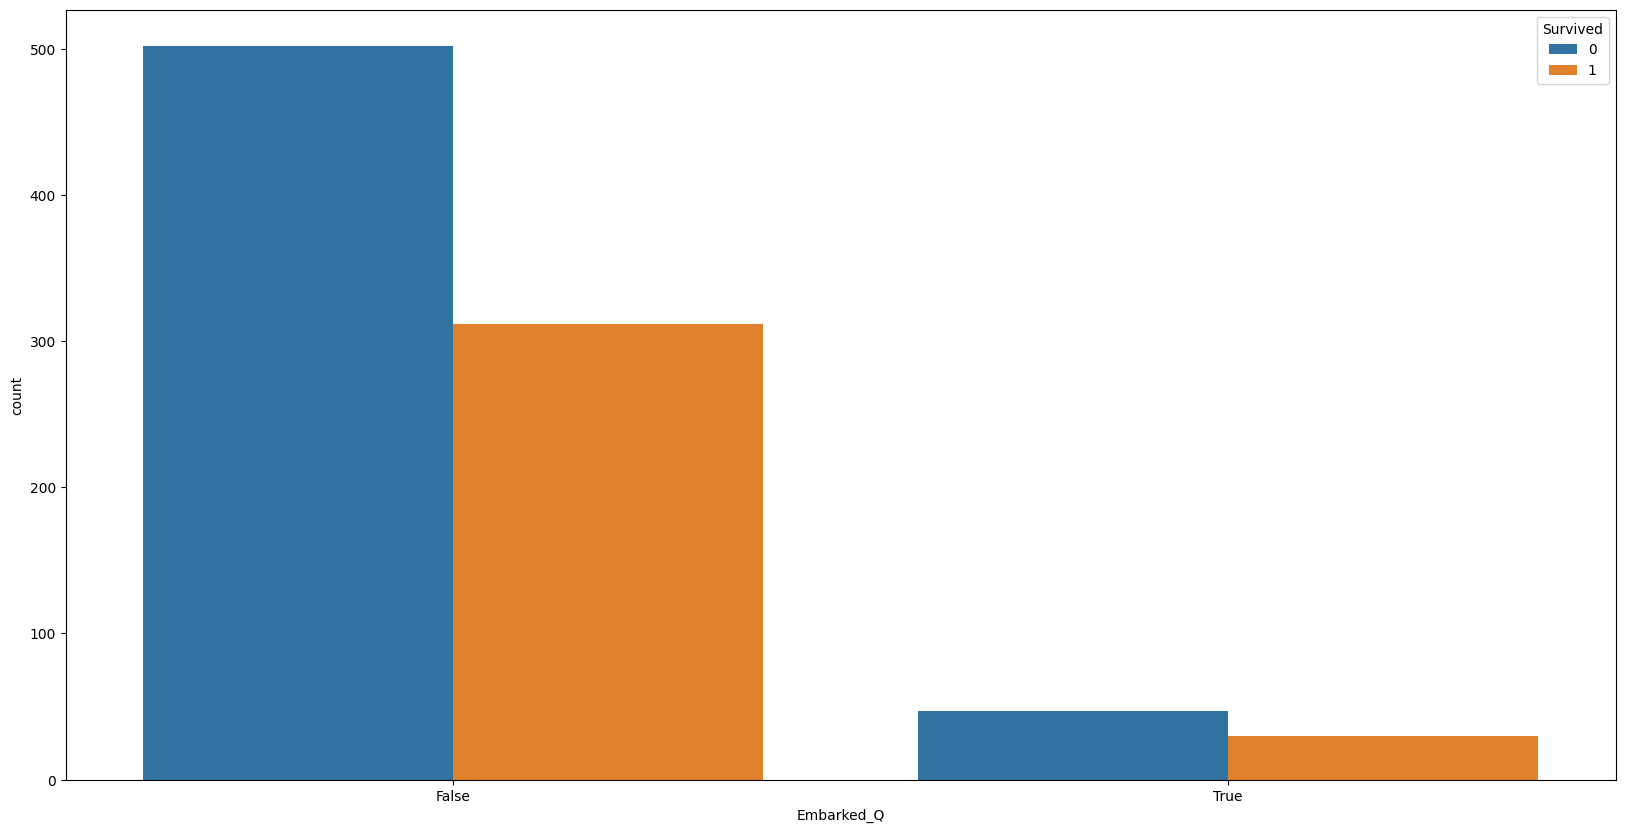

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Embarked_Q', hue='Survived', data=train_df)
plt.show()

# Outliers Tretment

In [ ]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to relevant columns
train_df = cap_outliers(train_df, 'Age')
train_df = cap_outliers(train_df, 'Fare')
train_df = cap_outliers(train_df, 'SibSp')
train_df = cap_outliers(train_df, 'Parch')

test_df = cap_outliers(test_df, 'Age')
test_df = cap_outliers(test_df, 'Fare')
test_df = cap_outliers(test_df, 'SibSp')
test_df = cap_outliers(test_df, 'Parch')


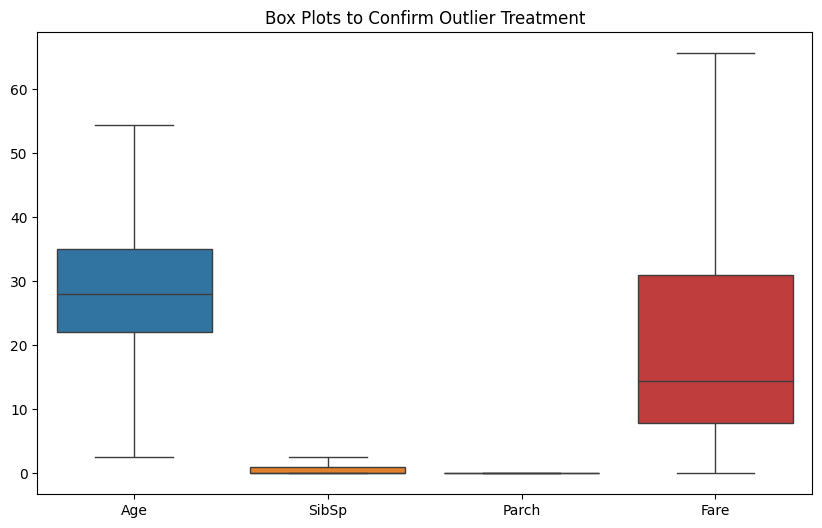

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df[['Age', 'SibSp', 'Parch', 'Fare']])
plt.title('Box Plots to Confirm Outlier Treatment')
plt.show()


**Correlation Matrix**

In [ ]:
numeric_df = train_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
numeric_df = numeric_df.select_dtypes(include=[np.number])


In [ ]:
numeric_df.dtypes

,0
Survived,int64
Pclass,int64
Age,float64
SibSp,float64
Parch,float64
Fare,float64


In [ ]:
train_df['Parch'].fillna(train_df['Parch'].median(), inplace=True)
test_df['Parch'].fillna(test_df['Parch'].median(), inplace=True)

train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [ ]:
numeric_df = train_df.drop(['Name', 'Ticket', 'PassengerId','Parch'], axis=1)
corr_matrix = numeric_df.corr()

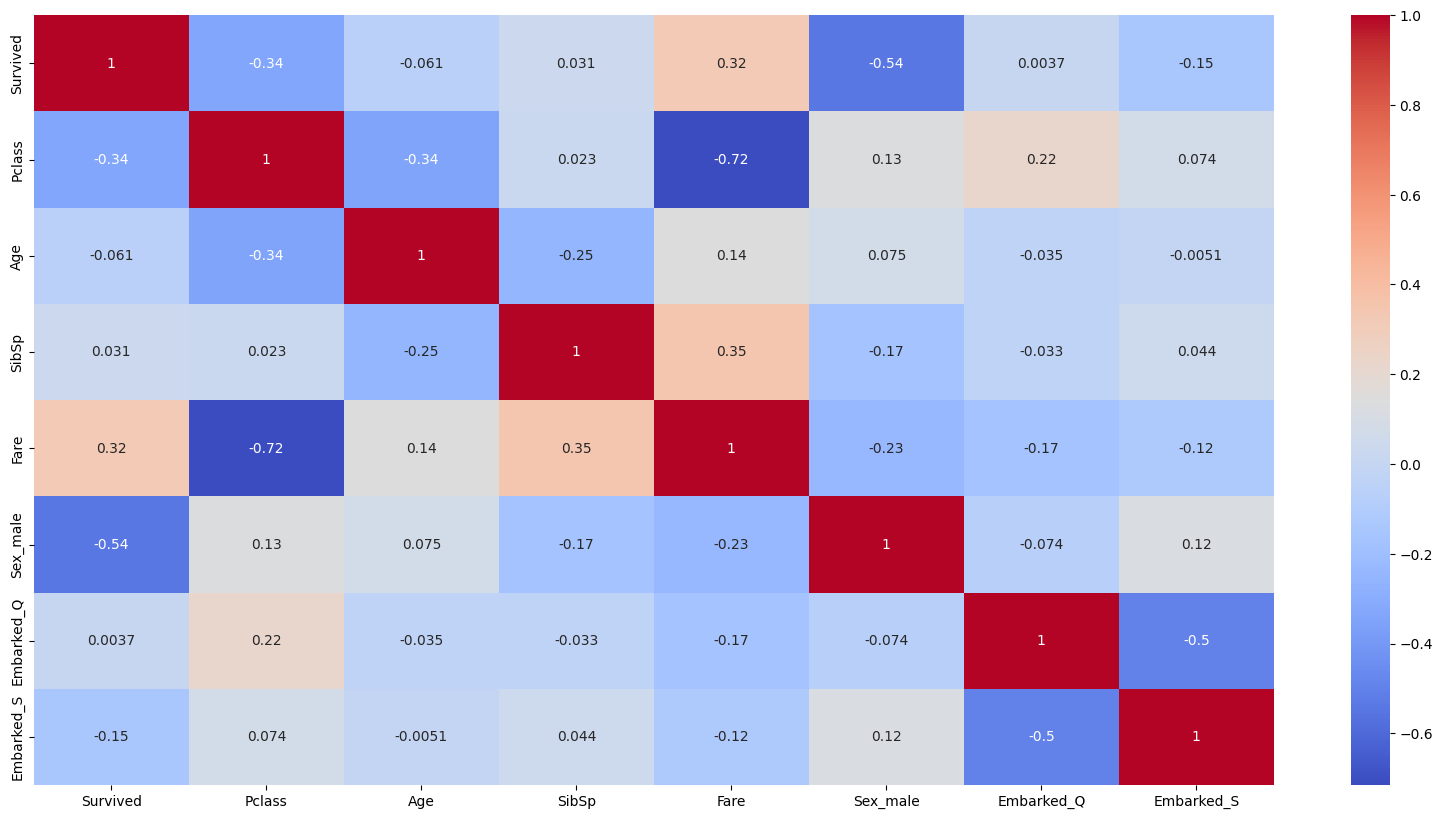

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

# Model Building:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = train_df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = train_df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
# Prepare the test data
X_final_test = test_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

# Make predictions on the test dataset
final_predictions = classifier.predict(X_final_test)

# Convert predictions to a DataFrame for easy interpretation
predictions_df = test_df[['PassengerId']].copy()
predictions_df['Survived'] = final_predictions

# Display the first few predictions
print(predictions_df.head())


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


# Model Evaluation:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")
print(f"F1 Score: {f1*100}")

Accuracy: 79.3296089385475
Precision: 75.34246575342466
Recall: 74.32432432432432
F1 Score: 74.82993197278913


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[87, 18],
       [19, 55]])

# ROC curve



ROC-AUC Score: 0.8817


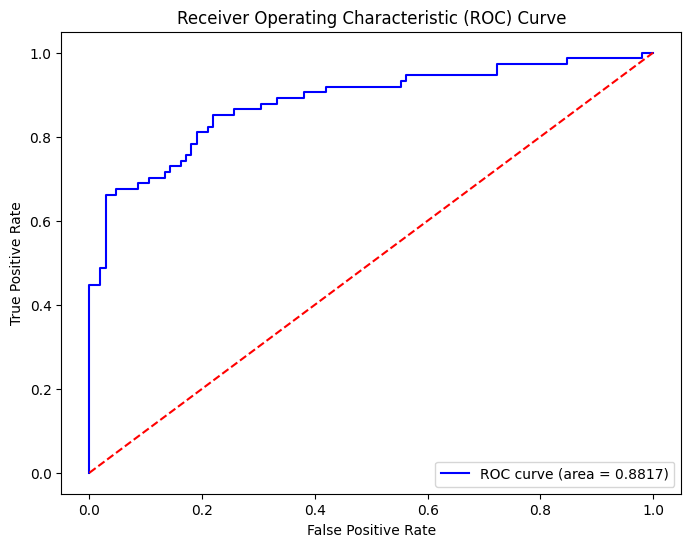

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for the test set
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Interpretation:

In [ ]:

coefficients = classifier.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)



      Feature  Coefficient
4        Fare     0.006563
3       Parch     0.000000
1         Age    -0.032049
6  Embarked_Q    -0.073938
2       SibSp    -0.382175
7  Embarked_S    -0.442396
0      Pclass    -0.933920
5    Sex_male    -2.533886


# Model Downloading for Streamlit

In [ ]:
import joblib

joblib.dump(classifier, 'logistic_model.pkl')

['logistic_model.pkl']

# Interview Questions:


1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?


1. What is the difference between precision and recall?

precision is the condition problity that the actual value is positive given the predection by the model is positive
where


              p=tp/tp+fp

        Precision = (True Positives) / (True Positives + False Positives)

Recall is the ratio of correctly predicted positive observations to all the observations in the actual class.

where

          r=tp/tp+fn
         Recall = (True Positives) / (True Positives + False Negatives)



2.What is cross-validation, and why is it important in binary classification?

Cross-validation divides data into subsets to train and test the model on different splits, ensuring reliable performances

Imports of Cross-validation

Reduces Overfitting

More Reliable Evaluation

Efficient Use of Data

Hyperparameter Tuning
